In [2]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [4]:
!pwd

/scratch/ss2686/toxcast_new/Models_v3.0/K-Fold


In [5]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp

,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [6]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [7]:
tox_list_bak=[ 'TOX21_AR_BLA_Antagonist_viability', 'TOX21_ERa_BLA_Antagonist_viability', 'TOX21_ESRE_BLA_viability', 'TOX21_FXR_BLA_antagonist_viability', 'TOX21_GR_BLA_Antagonist_viability', 'TOX21_HSE_BLA_agonist_viability', 'TOX21_MMP_viability', 'TOX21_NFkB_BLA_agonist_viability', 'TOX21_p53_BLA_p1_viability', 'TOX21_p53_BLA_p2_viability', 'TOX21_p53_BLA_p3_viability', 'TOX21_p53_BLA_p4_viability', 'TOX21_p53_BLA_p5_viability', 'TOX21_PPARg_BLA_antagonist_viability', 'TOX21_VDR_BLA_Agonist_viability', 'TOX21_VDR_BLA_antagonist_viability', 'BSK_3C_SRB_down', 'BSK_4H_SRB_down', 'BSK_BE3C_SRB_down', 'BSK_CASM3C_SRB_down', 'BSK_hDFCGF_SRB_down', 'BSK_KF3CT_SRB_down', 'BSK_LPS_SRB_down', 'BSK_SAg_PBMCCytotoxicity_down', 'BSK_SAg_SRB_down', 'ACEA_T47D_80hr_Negative', 'APR_HepG2_CellLoss_24h_dn', 'APR_HepG2_CellLoss_72h_dn', 'BSK_3C_Proliferation_down', 'BSK_3C_Vis_down', 'BSK_CASM3C_Proliferation_down', 'BSK_hDFCGF_Proliferation_down', 'BSK_SAg_Proliferation_down', 'smiles_r' ]

In [8]:
tox_list=['BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
         ]

In [9]:
our_data=toxcast.reindex(columns=tox_list)

In [10]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))



In [12]:
from sklearn.feature_selection import VarianceThreshold



In [13]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [14]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [15]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [16]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [17]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [18]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [19]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


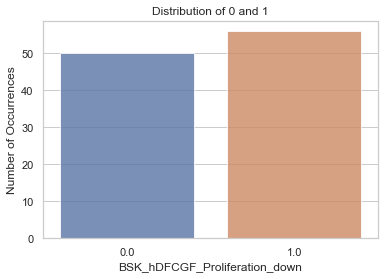

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   15.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.0s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [3 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.69      0.75      0.72        12

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.68      0.68      0.68        22

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 1]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        10
         1.0       0.88      0.64      0.74        11

    accuracy                           0.76        21
   macro avg       0.78      0.77      0.76        21
weighted avg       0.79      0.76      0.76        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        10
         1.0       0.69      0.82      0.75        11

    accuracy                           0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67        10
         1.0       0.71      0.45      0.56        11

    accuracy                           0.62        21
   macro avg       0.64      0.63      0.61        21
weighted avg       0.65      0.62      0.61        21

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 5]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.64      0.82      0.72        11

    accuracy                           0.67        21
   macro avg       0.68      0.66      0.65        21
weighted avg       0.68      0.67      0.66        21



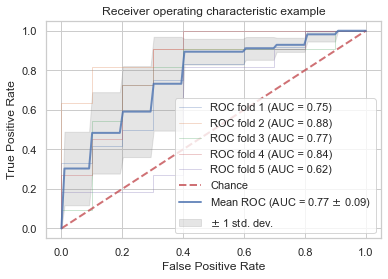

Mean of Each fold


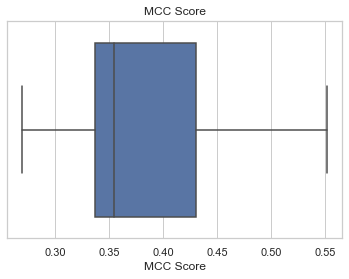

Matthews_corrcoef all:  [0.3544587784792833, 0.5516187241049897, 0.4300756154038903, 0.26967994498529685, 0.337099931231621]
Matthews_corrcoef mean:  0.3885865988410162


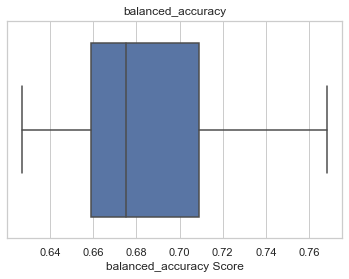

balanced_accuracy all:  [0.675, 0.7681818181818182, 0.7090909090909091, 0.6272727272727273, 0.6590909090909092]
balanced_accuracy mean:  0.6877272727272727


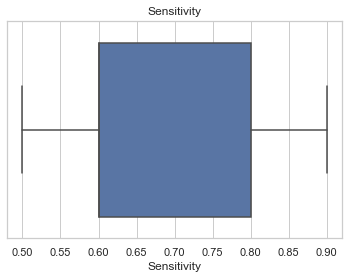

Sensitivity all:  [0.6, 0.9, 0.6, 0.8, 0.5]
Sensitivity mean:  0.68


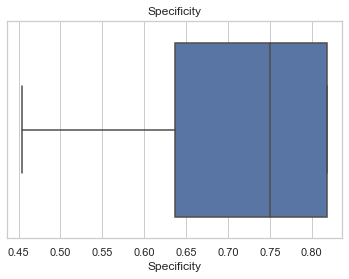

Specificity all:  [0.75, 0.6363636363636364, 0.8181818181818182, 0.45454545454545453, 0.8181818181818182]
Specificity mean:  0.6954545454545455
One Combined Confusion Matrix
conf_matrix: 
  [[34 16]
 [17 39]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.68      0.67        50
         1.0       0.71      0.70      0.70        56

    accuracy                           0.69       106
   macro avg       0.69      0.69      0.69       106
weighted avg       0.69      0.69      0.69       106

matthews_corrcoef
0.3760929239508335
balanced_accuracy_score
0.6882142857142857
Sensitivity
0.68
Specificity
0.6964285714285714
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7339285714285714


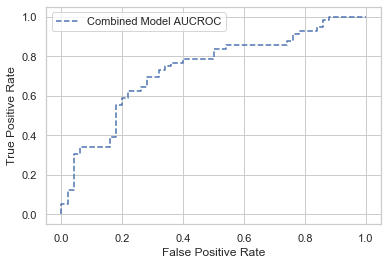

Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


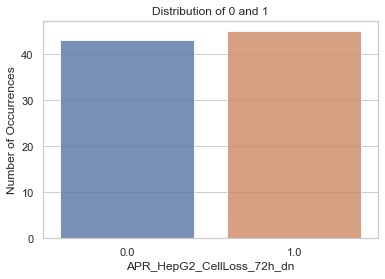

Total Compounds in Assay:  88
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 2]
 [1 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.82         9
         1.0       0.80      0.89      0.84         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18

Total Selected train:  70
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80         9
         1.0       0.86      0.67      0.75         9

    accuracy                           0.78        18
   macro avg       0.79      0.78      0.77        18
weighted avg       0.79      0.78      0.77        18

Total Selected train:  70
Total Selected test:  1

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 2]
 [2 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78         9
         1.0       0.78      0.78      0.78         9

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

Total Selected train:  71
Total Selected test:  17

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 1]
 [5 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.88      0.70         8
         1.0       0.80      0.44      0.57         9

    accuracy                           0.65        17
   macro avg       0.69      0.66      0.64        17
weighted avg       0.70      0.65      0.63        17

Total Selected train:  71
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71         8
         1.0       0.75      0.67      0.71         9

    accuracy                           0.71        17
   macro avg       0.71      0.71      0.71        17
weighted avg       0.71      0.71      0.71        17



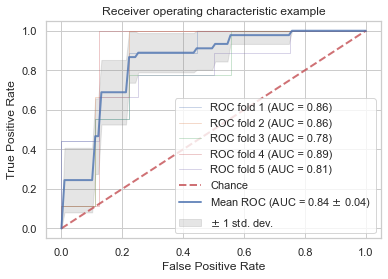

Mean of Each fold


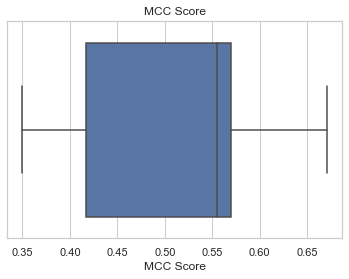

Matthews_corrcoef all:  [0.6708203932499369, 0.5698028822981898, 0.5555555555555556, 0.34993385618385614, 0.4166666666666667]
Matthews_corrcoef mean:  0.512555870790841


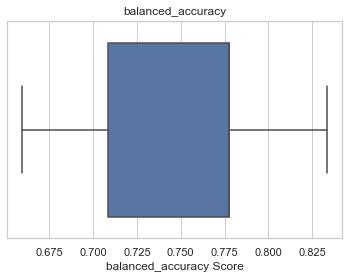

balanced_accuracy all:  [0.8333333333333333, 0.7777777777777777, 0.7777777777777778, 0.6597222222222222, 0.7083333333333333]
balanced_accuracy mean:  0.7513888888888889


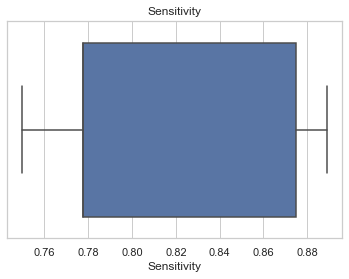

Sensitivity all:  [0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.875, 0.75]
Sensitivity mean:  0.8138888888888889


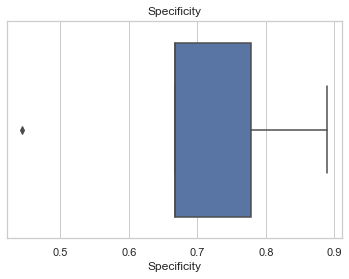

Specificity all:  [0.8888888888888888, 0.6666666666666666, 0.7777777777777778, 0.4444444444444444, 0.6666666666666666]
Specificity mean:  0.6888888888888889
One Combined Confusion Matrix
conf_matrix: 
  [[35  8]
 [14 31]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.81      0.76        43
         1.0       0.79      0.69      0.74        45

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.76      0.75      0.75        88

matthews_corrcoef
0.5059900911134941
balanced_accuracy_score
0.7514211886304909
Sensitivity
0.813953488372093
Specificity
0.6888888888888889
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.8299741602067183


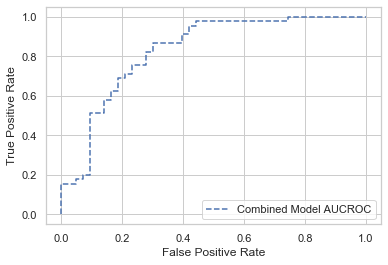

Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


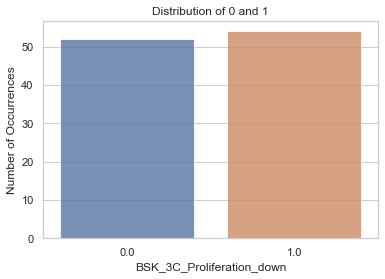

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.54      0.64      0.58        11
         1.0       0.56      0.45      0.50        11

    accuracy                           0.55        22
   macro avg       0.55      0.55      0.54        22
weighted avg       0.55      0.55      0.54        22

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 1]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        10
         1.0       0.88      0.64      0.74        11

    accuracy                           0.76        21
   macro avg       0.78      0.77      0.76        21
weighted avg       0.79      0.76      0.76        21

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 3]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        10
         1.0       0.70      0.64      0.67        11

    accuracy                           0.67        21
   macro avg       0.67      0.67      0.67        21
weighted avg       0.67      0.67      0.67        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [2 9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        10
         1.0       0.69      0.82      0.75        11

    accuracy                           0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 5]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.55      0.55      0.55        11
         1.0       0.50      0.50      0.50        10

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.52        21
weighted avg       0.52      0.52      0.52        21



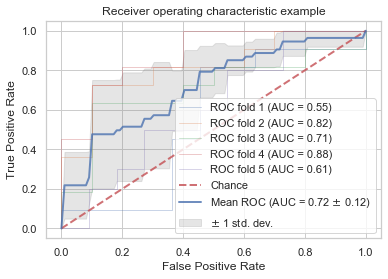

Mean of Each fold


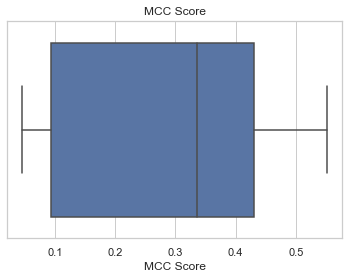

Matthews_corrcoef all:  [0.09245003270420485, 0.5516187241049897, 0.33636363636363636, 0.4300756154038903, 0.045454545454545456]
Matthews_corrcoef mean:  0.2911925108062533


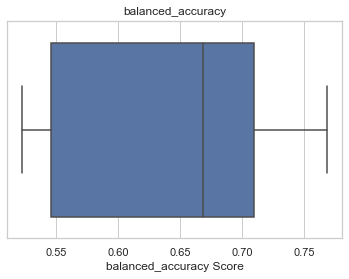

balanced_accuracy all:  [0.5454545454545454, 0.7681818181818182, 0.6681818181818182, 0.7090909090909091, 0.5227272727272727]
balanced_accuracy mean:  0.6427272727272728


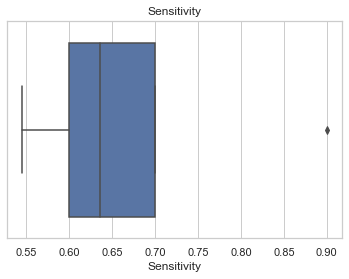

Sensitivity all:  [0.6363636363636364, 0.9, 0.7, 0.6, 0.5454545454545454]
Sensitivity mean:  0.6763636363636364


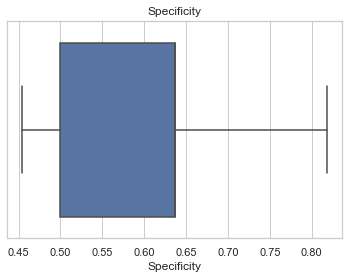

Specificity all:  [0.45454545454545453, 0.6363636363636364, 0.6363636363636364, 0.8181818181818182, 0.5]
Specificity mean:  0.6090909090909091
One Combined Confusion Matrix
conf_matrix: 
  [[35 17]
 [21 33]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.65        52
         1.0       0.66      0.61      0.63        54

    accuracy                           0.64       106
   macro avg       0.64      0.64      0.64       106
weighted avg       0.64      0.64      0.64       106

matthews_corrcoef
0.2845937275197571
balanced_accuracy_score
0.6420940170940171
Sensitivity
0.6730769230769231
Specificity
0.6111111111111112
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6965811965811967


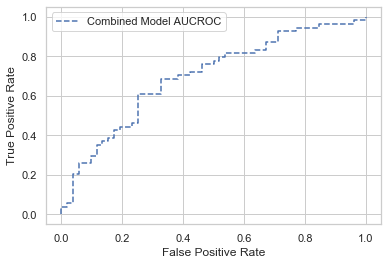

Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


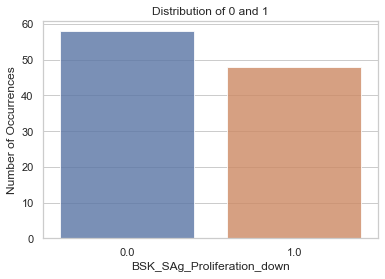

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  2]
 [ 5  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.83      0.74        12
         1.0       0.71      0.50      0.59        10

    accuracy                           0.68        22
   macro avg       0.69      0.67      0.66        22
weighted avg       0.69      0.68      0.67        22

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 7]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.44      0.36      0.40        11
         1.0       0.42      0.50      0.45        10

    accuracy                           0.43        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.43      0.43      0.43        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 5]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.55      0.55      0.55        11
         1.0       0.50      0.50      0.50        10

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.52        21
weighted avg       0.52      0.52      0.52        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 5]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.58      0.64        12
         1.0       0.55      0.67      0.60         9

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 3]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        12
         1.0       0.62      0.56      0.59         9

    accuracy                           0.67        21
   macro avg       0.66      0.65      0.65        21
weighted avg       0.66      0.67      0.66        21



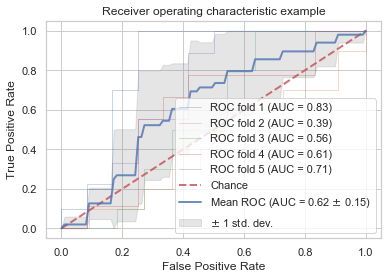

Mean of Each fold


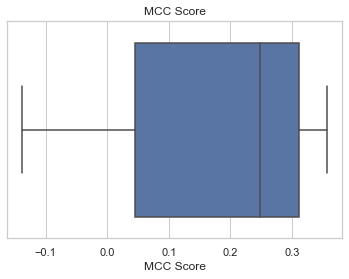

Matthews_corrcoef all:  [0.3563483225498992, -0.13762047064079508, 0.045454545454545456, 0.24771684715343112, 0.31137618438976383]
Matthews_corrcoef mean:  0.1646550857813689


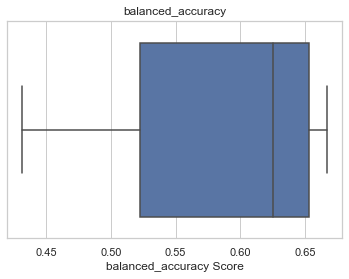

balanced_accuracy all:  [0.6666666666666667, 0.4318181818181818, 0.5227272727272727, 0.625, 0.6527777777777778]
balanced_accuracy mean:  0.5797979797979798


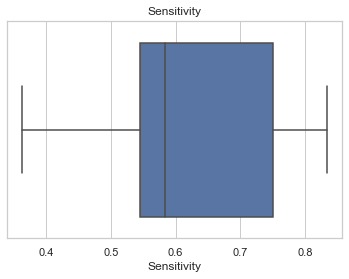

Sensitivity all:  [0.8333333333333334, 0.36363636363636365, 0.5454545454545454, 0.5833333333333334, 0.75]
Sensitivity mean:  0.6151515151515151


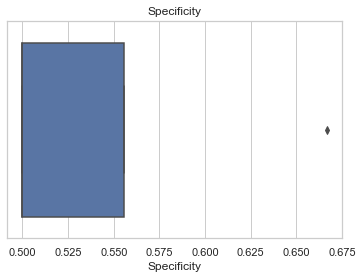

Specificity all:  [0.5, 0.5, 0.5, 0.6666666666666666, 0.5555555555555556]
Specificity mean:  0.5444444444444445
One Combined Confusion Matrix
conf_matrix: 
  [[36 22]
 [22 26]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.62      0.62        58
         1.0       0.54      0.54      0.54        48

    accuracy                           0.58       106
   macro avg       0.58      0.58      0.58       106
weighted avg       0.58      0.58      0.58       106

matthews_corrcoef
0.16235632183908047
balanced_accuracy_score
0.5811781609195402
Sensitivity
0.6206896551724138
Specificity
0.5416666666666666
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5959051724137931


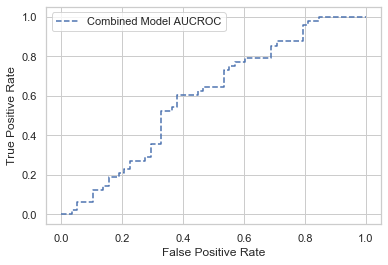

Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


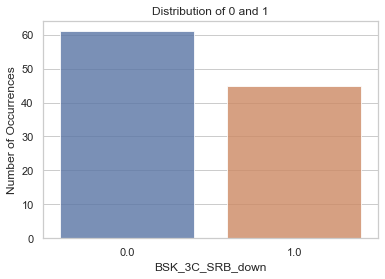

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 7  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.61      0.85      0.71        13
         1.0       0.50      0.22      0.31         9

    accuracy                           0.59        22
   macro avg       0.56      0.53      0.51        22
weighted avg       0.57      0.59      0.55        22

Total Selected train:  85
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 9]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.43      0.25      0.32        12
         1.0       0.36      0.56      0.43         9

    accuracy                           0.38        21
   macro avg       0.39      0.40      0.38        21
weighted avg       0.40      0.38      0.37        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  0]
 [ 8  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        12
         1.0       1.00      0.11      0.20         9

    accuracy                           0.62        21
   macro avg       0.80      0.56      0.47        21
weighted avg       0.77      0.62      0.51        21

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  0]
 [ 9  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        12
         1.0       0.00      0.00      0.00         9

    accuracy                           0.57        21
   macro avg       0.29      0.50      0.36        21
weighted avg       0.33      0.57      0.42        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [7 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        12
         1.0       0.33      0.22      0.27         9

    accuracy                           0.48        21
   macro avg       0.43      0.44      0.43        21
weighted avg       0.45      0.48      0.45        21



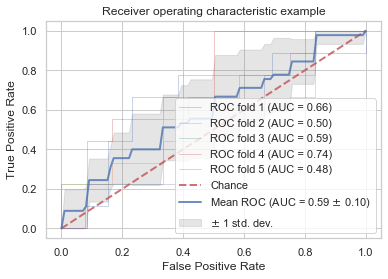

Mean of Each fold


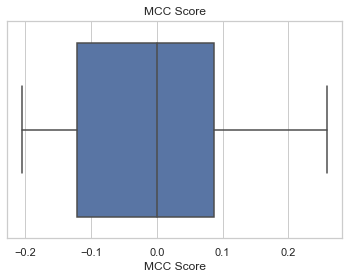

Matthews_corrcoef all:  [0.0871627267280818, -0.2041241452319315, 0.25819888974716115, 0.0, -0.12171612389003691]
Matthews_corrcoef mean:  0.003904269470654903


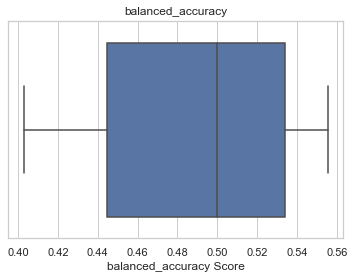

balanced_accuracy all:  [0.5341880341880342, 0.4027777777777778, 0.5555555555555556, 0.5, 0.4444444444444444]
balanced_accuracy mean:  0.4873931623931623


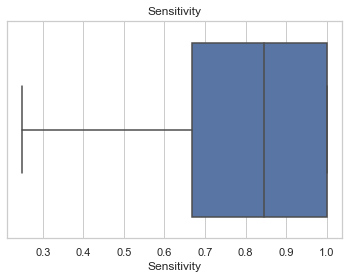

Sensitivity all:  [0.8461538461538461, 0.25, 1.0, 1.0, 0.6666666666666666]
Sensitivity mean:  0.7525641025641026


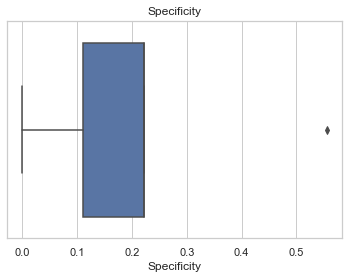

Specificity all:  [0.2222222222222222, 0.5555555555555556, 0.1111111111111111, 0.0, 0.2222222222222222]
Specificity mean:  0.22222222222222224
One Combined Confusion Matrix
conf_matrix: 
  [[46 15]
 [35 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.75      0.65        61
         1.0       0.40      0.22      0.29        45

    accuracy                           0.53       106
   macro avg       0.48      0.49      0.47       106
weighted avg       0.50      0.53      0.49       106

matthews_corrcoef
-0.027569549429926985
balanced_accuracy_score
0.48816029143897993
Sensitivity
0.7540983606557377
Specificity
0.2222222222222222
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5333333333333334


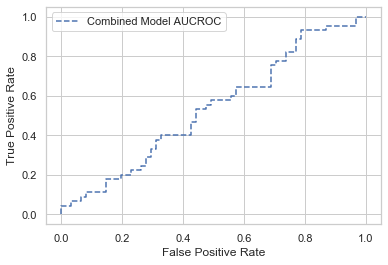

Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


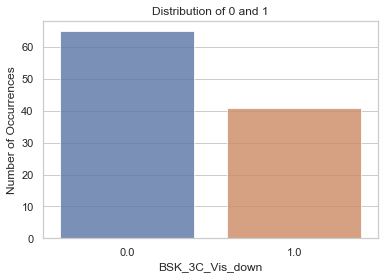

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 6]
 [4 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.54      0.58        13
         1.0       0.45      0.56      0.50         9

    accuracy                           0.55        22
   macro avg       0.55      0.55      0.54        22
weighted avg       0.56      0.55      0.55        22

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.77        13
         1.0       0.67      0.25      0.36         8

    accuracy                           0.67        21
   macro avg       0.67      0.59      0.57        21
weighted avg       0.67      0.67      0.62        21

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 7  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        13
         1.0       1.00      0.12      0.22         8

    accuracy                           0.67        21
   macro avg       0.82      0.56      0.51        21
weighted avg       0.78      0.67      0.57        21

Total Selected train:  85
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   26.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.5s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 4]
 [3 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        13
         1.0       0.56      0.62      0.59         8

    accuracy                           0.67        21
   macro avg       0.65      0.66      0.65        21
weighted avg       0.68      0.67      0.67        21

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.7min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 8  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.92      0.73        13
         1.0       0.00      0.00      0.00         8

    accuracy                           0.57        21
   macro avg       0.30      0.46      0.36        21
weighted avg       0.37      0.57      0.45        21



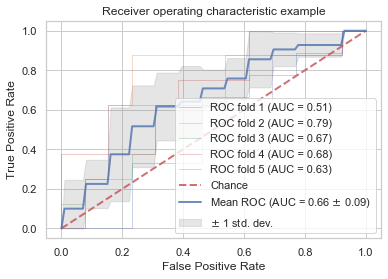

Mean of Each fold


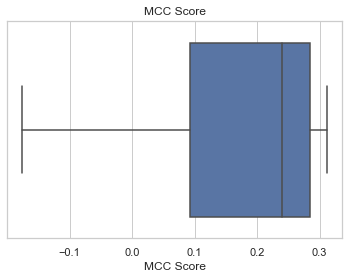

Matthews_corrcoef all:  [0.09245003270420485, 0.2401922307076307, 0.2850438562747845, 0.31137618438976383, -0.17541160386140586]
Matthews_corrcoef mean:  0.15073014004299562


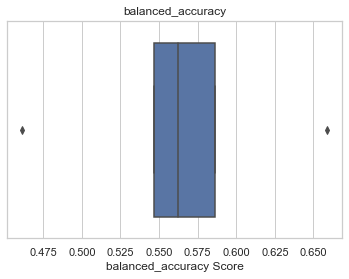

balanced_accuracy all:  [0.5470085470085471, 0.5865384615384616, 0.5625, 0.6586538461538461, 0.46153846153846156]
balanced_accuracy mean:  0.5632478632478632


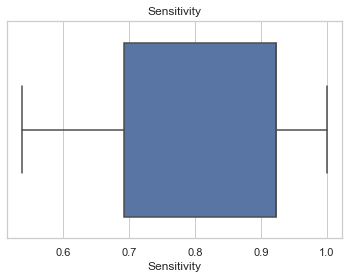

Sensitivity all:  [0.5384615384615384, 0.9230769230769231, 1.0, 0.6923076923076923, 0.9230769230769231]
Sensitivity mean:  0.8153846153846155


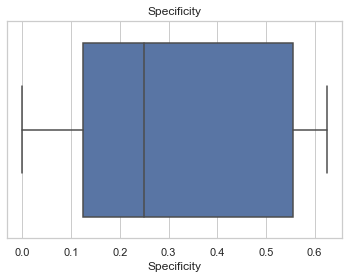

Specificity all:  [0.5555555555555556, 0.25, 0.125, 0.625, 0.0]
Specificity mean:  0.3111111111111111
One Combined Confusion Matrix
conf_matrix: 
  [[53 12]
 [28 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.82      0.73        65
         1.0       0.52      0.32      0.39        41

    accuracy                           0.62       106
   macro avg       0.59      0.57      0.56       106
weighted avg       0.60      0.62      0.60       106

matthews_corrcoef
0.1519545066732217
balanced_accuracy_score
0.5662288930581614
Sensitivity
0.8153846153846154
Specificity
0.3170731707317073
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.625515947467167


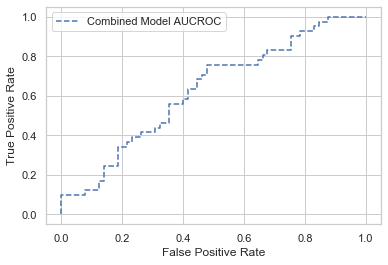

Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


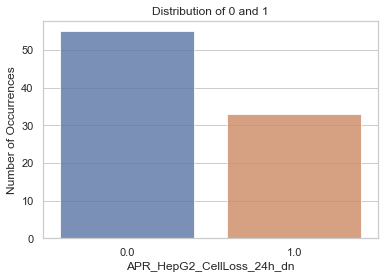

Total Compounds in Assay:  88
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      1.00      0.81        11
         1.0       1.00      0.29      0.44         7

    accuracy                           0.72        18
   macro avg       0.84      0.64      0.63        18
weighted avg       0.81      0.72      0.67        18

Total Selected train:  70
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.91      0.77        11
         1.0       0.67      0.29      0.40         7

    accuracy                           0.67        18
   macro avg       0.67      0.60      0.58        18
weighted avg       0.67      0.67      0.63        18

Total Selected train:  70
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.64      0.61        11
         1.0       0.33      0.29      0.31         7

    accuracy                           0.50        18
   macro avg       0.46      0.46      0.46        18
weighted avg       0.49      0.50      0.49        18

Total Selected train:  71
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.91      0.80        11
         1.0       0.67      0.33      0.44         6

    accuracy                           0.71        17
   macro avg       0.69      0.62      0.62        17
weighted avg       0.70      0.71      0.67        17

Total Selected train:  71
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 2]
 [4 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.82      0.75        11
         1.0       0.50      0.33      0.40         6

    accuracy                           0.65        17
   macro avg       0.60      0.58      0.58        17
weighted avg       0.62      0.65      0.63        17



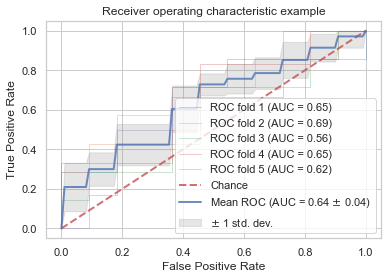

Mean of Each fold


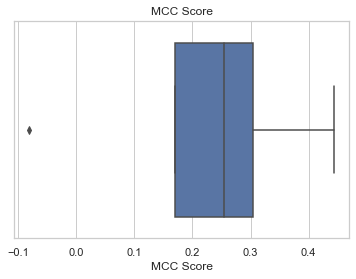

Matthews_corrcoef all:  [0.44320263021395917, 0.2548235957188128, -0.08058229640253803, 0.3038948705590345, 0.1706971854997297]
Matthews_corrcoef mean:  0.21840719711779966


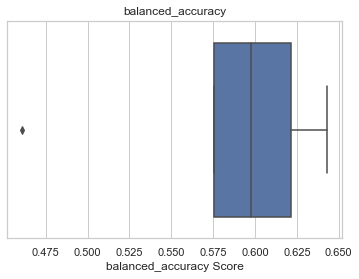

balanced_accuracy all:  [0.6428571428571428, 0.5974025974025974, 0.461038961038961, 0.6212121212121212, 0.5757575757575758]
balanced_accuracy mean:  0.5796536796536796


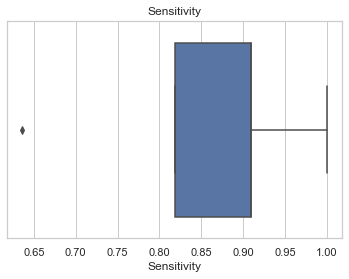

Sensitivity all:  [1.0, 0.9090909090909091, 0.6363636363636364, 0.9090909090909091, 0.8181818181818182]
Sensitivity mean:  0.8545454545454545


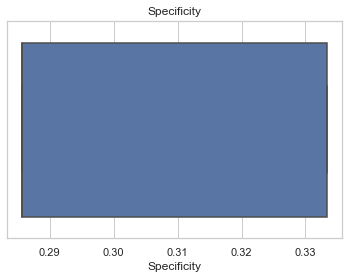

Specificity all:  [0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.3333333333333333, 0.3333333333333333]
Specificity mean:  0.30476190476190473
One Combined Confusion Matrix
conf_matrix: 
  [[47  8]
 [23 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.85      0.75        55
         1.0       0.56      0.30      0.39        33

    accuracy                           0.65        88
   macro avg       0.61      0.58      0.57        88
weighted avg       0.63      0.65      0.62        88

matthews_corrcoef
0.18912217153786007
balanced_accuracy_score
0.5787878787878787
Sensitivity
0.8545454545454545
Specificity
0.30303030303030304
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6104683195592286


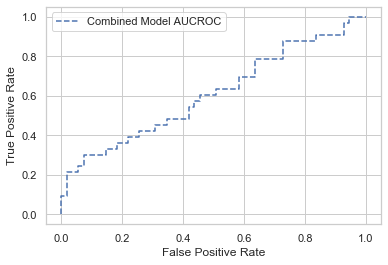

Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


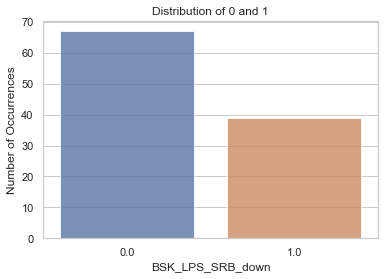

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   27.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.0s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 6]
 [6 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.57      0.57        14
         1.0       0.25      0.25      0.25         8

    accuracy                           0.45        22
   macro avg       0.41      0.41      0.41        22
weighted avg       0.45      0.45      0.45        22

Total Selected train:  85
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.77      0.69        13
         1.0       0.40      0.25      0.31         8

    accuracy                           0.57        21
   macro avg       0.51      0.51      0.50        21
weighted avg       0.54      0.57      0.54        21

Total Selected train:  85
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 8  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        13
         1.0       0.00      0.00      0.00         8

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   27.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 8  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.76        13
         1.0       0.00      0.00      0.00         8

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


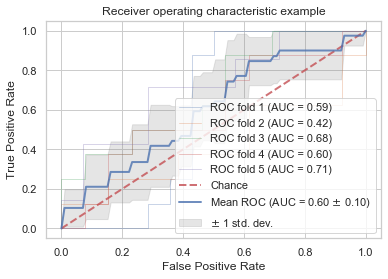

Mean of Each fold


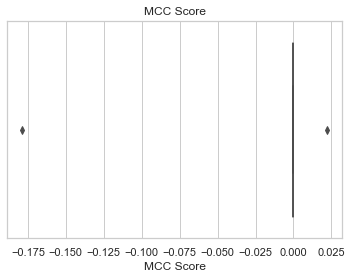

Matthews_corrcoef all:  [-0.17857142857142858, 0.021926450482675733, 0.0, 0.0, 0.0]
Matthews_corrcoef mean:  -0.031328995617750564


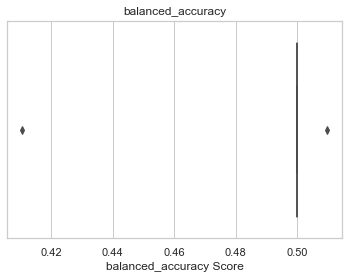

balanced_accuracy all:  [0.4107142857142857, 0.5096153846153846, 0.5, 0.5, 0.5]
balanced_accuracy mean:  0.484065934065934


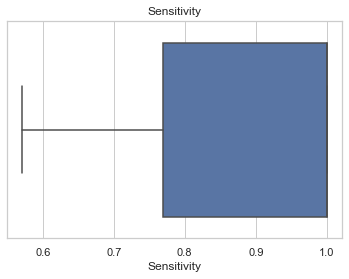

Sensitivity all:  [0.5714285714285714, 0.7692307692307693, 1.0, 1.0, 1.0]
Sensitivity mean:  0.8681318681318683


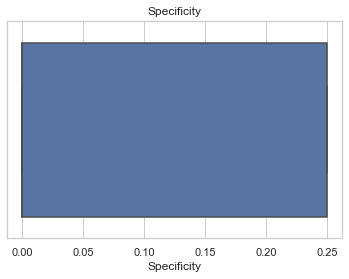

Specificity all:  [0.25, 0.25, 0.0, 0.0, 0.0]
Specificity mean:  0.1
One Combined Confusion Matrix
conf_matrix: 
  [[58  9]
 [35  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.87      0.72        67
         1.0       0.31      0.10      0.15        39

    accuracy                           0.58       106
   macro avg       0.47      0.48      0.44       106
weighted avg       0.51      0.58      0.51       106

matthews_corrcoef
-0.046697672718481284
balanced_accuracy_score
0.4841178721775736
Sensitivity
0.8656716417910447
Specificity
0.10256410256410256
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5778798316111748


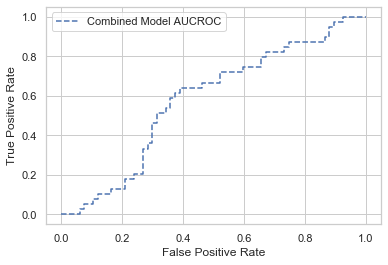

Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


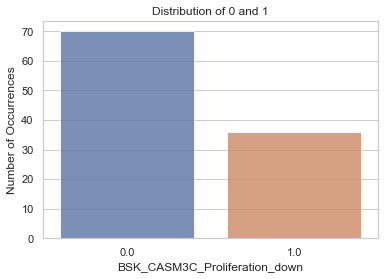

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       1.00      0.12      0.22         8

    accuracy                           0.68        22
   macro avg       0.83      0.56      0.51        22
weighted avg       0.79      0.68      0.59        22

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        14
         1.0       0.50      0.29      0.36         7

    accuracy                           0.67        21
   macro avg       0.60      0.57      0.57        21
weighted avg       0.64      0.67      0.64        21

Total Selected train:  85
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 8]
 [4 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.43      0.50        14
         1.0       0.27      0.43      0.33         7

    accuracy                           0.43        21
   macro avg       0.44      0.43      0.42        21
weighted avg       0.49      0.43      0.44        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21



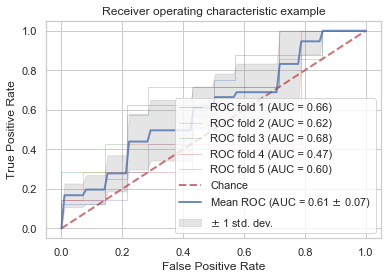

Mean of Each fold


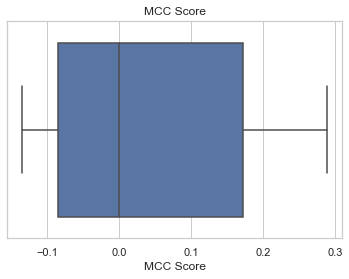

Matthews_corrcoef all:  [0.28867513459481287, 0.17149858514250885, 0.0, -0.13483997249264842, -0.08574929257125442]
Matthews_corrcoef mean:  0.047916890934683765


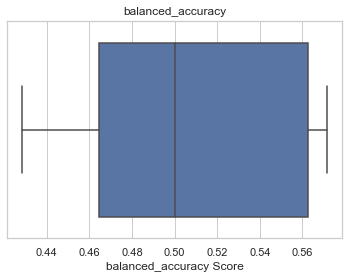

balanced_accuracy all:  [0.5625, 0.5714285714285714, 0.5, 0.42857142857142855, 0.4642857142857143]
balanced_accuracy mean:  0.5053571428571428


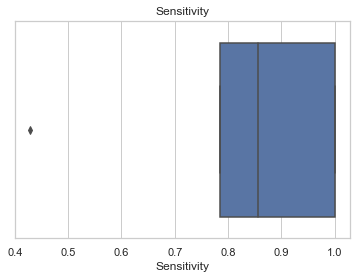

Sensitivity all:  [1.0, 0.8571428571428571, 1.0, 0.42857142857142855, 0.7857142857142857]
Sensitivity mean:  0.8142857142857143


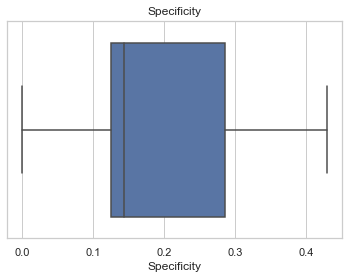

Specificity all:  [0.125, 0.2857142857142857, 0.0, 0.42857142857142855, 0.14285714285714285]
Specificity mean:  0.1964285714285714
One Combined Confusion Matrix
conf_matrix: 
  [[57 13]
 [29  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.66      0.81      0.73        70
         1.0       0.35      0.19      0.25        36

    accuracy                           0.60       106
   macro avg       0.51      0.50      0.49       106
weighted avg       0.56      0.60      0.57       106

matthews_corrcoef
0.010567157657910975
balanced_accuracy_score
0.5043650793650793
Sensitivity
0.8142857142857143
Specificity
0.19444444444444445
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5361111111111112


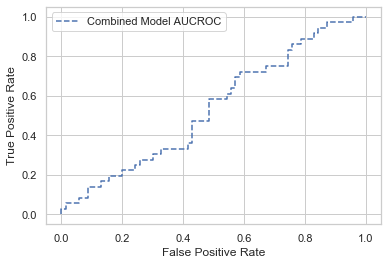

Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


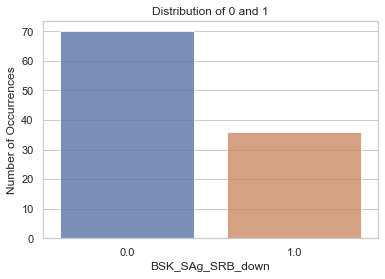

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.40      0.25      0.31         8

    accuracy                           0.59        22
   macro avg       0.52      0.52      0.51        22
weighted avg       0.56      0.59      0.56        22

Total Selected train:  85
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 5]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.64      0.69        14
         1.0       0.44      0.57      0.50         7

    accuracy                           0.62        21
   macro avg       0.60      0.61      0.60        21
weighted avg       0.65      0.62      0.63        21

Total Selected train:  85
Total Selected tes

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 5]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        14
         1.0       0.29      0.29      0.29         7

    accuracy                           0.52        21
   macro avg       0.46      0.46      0.46        21
weighted avg       0.52      0.52      0.52        21



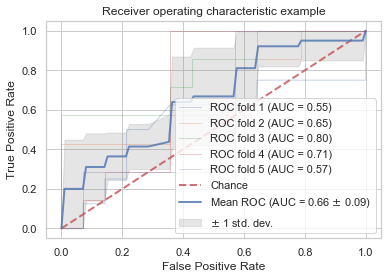

Mean of Each fold


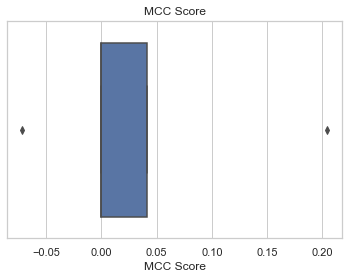

Matthews_corrcoef all:  [0.040996003084539386, 0.2041241452319315, 0.0, 0.0, -0.07142857142857142]
Matthews_corrcoef mean:  0.03473831537757989


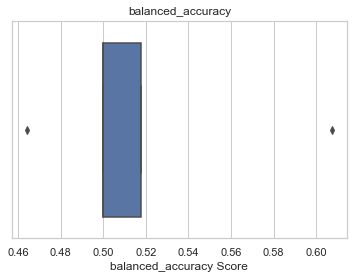

balanced_accuracy all:  [0.5178571428571428, 0.6071428571428572, 0.5, 0.5, 0.4642857142857143]
balanced_accuracy mean:  0.5178571428571429


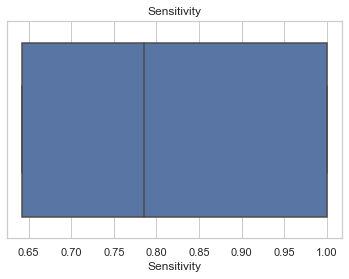

Sensitivity all:  [0.7857142857142857, 0.6428571428571429, 1.0, 1.0, 0.6428571428571429]
Sensitivity mean:  0.8142857142857144


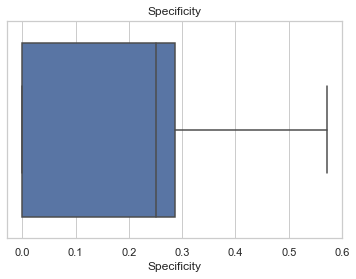

Specificity all:  [0.25, 0.5714285714285714, 0.0, 0.0, 0.2857142857142857]
Specificity mean:  0.22142857142857145
One Combined Confusion Matrix
conf_matrix: 
  [[57 13]
 [28  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.81      0.74        70
         1.0       0.38      0.22      0.28        36

    accuracy                           0.61       106
   macro avg       0.53      0.52      0.51       106
weighted avg       0.57      0.61      0.58       106

matthews_corrcoef
0.04337789235897811
balanced_accuracy_score
0.5182539682539682
Sensitivity
0.8142857142857143
Specificity
0.2222222222222222
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5970238095238095


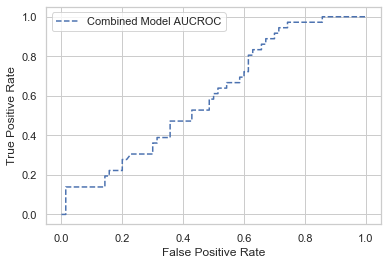

Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


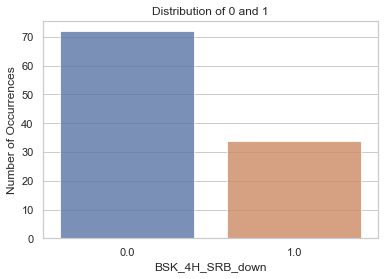

Total Compounds in Assay:  106
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  1]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.93      0.78        15
         1.0       0.00      0.00      0.00         7

    accuracy                           0.64        22
   macro avg       0.33      0.47      0.39        22
weighted avg       0.45      0.64      0.53        22

Total Selected train:  85
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  85
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21

Total Selected train:  85
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   26.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.5min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  4]
 [ 5  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.73      0.71        15
         1.0       0.20      0.17      0.18         6

    accuracy                           0.57        21
   macro avg       0.44      0.45      0.45        21
weighted avg       0.55      0.57      0.56        21



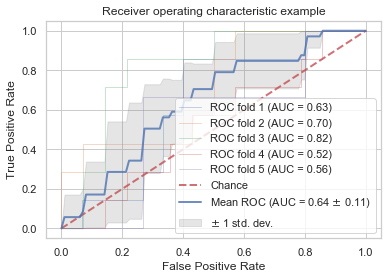

Mean of Each fold


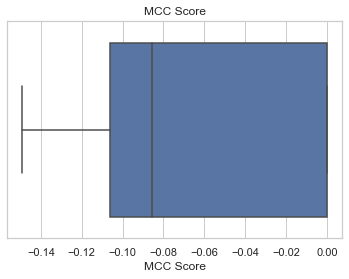

Matthews_corrcoef all:  [-0.14907119849998599, 0.0, 0.0, -0.08574929257125442, -0.10606601717798213]
Matthews_corrcoef mean:  -0.06817730164984451


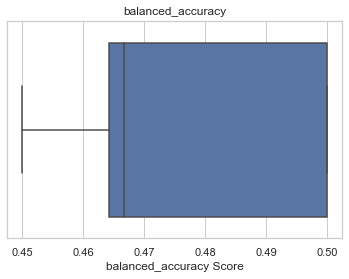

balanced_accuracy all:  [0.4666666666666667, 0.5, 0.5, 0.4642857142857143, 0.44999999999999996]
balanced_accuracy mean:  0.4761904761904763


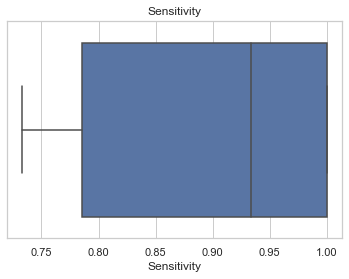

Sensitivity all:  [0.9333333333333333, 1.0, 1.0, 0.7857142857142857, 0.7333333333333333]
Sensitivity mean:  0.8904761904761905


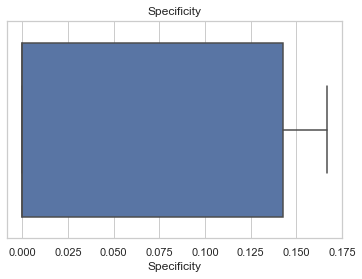

Specificity all:  [0.0, 0.0, 0.0, 0.14285714285714285, 0.16666666666666666]
Specificity mean:  0.06190476190476191
One Combined Confusion Matrix
conf_matrix: 
  [[64  8]
 [32  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.89      0.76        72
         1.0       0.20      0.06      0.09        34

    accuracy                           0.62       106
   macro avg       0.43      0.47      0.43       106
weighted avg       0.52      0.62      0.55       106

matthews_corrcoef
-0.08349657214468659
balanced_accuracy_score
0.4738562091503268
Sensitivity
0.8888888888888888
Specificity
0.058823529411764705
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5592320261437909


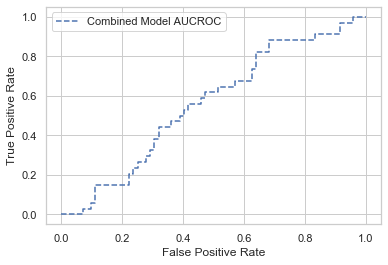

Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


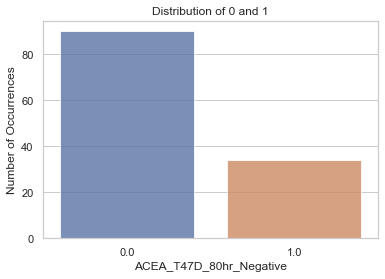

Total Compounds in Assay:  124
Total Selected train:  99
Total Selected test:  25
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        18
         1.0       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  99
Total Selected test:  25
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16  2]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.89      0.78        18
         1.0       0.00      0.00      0.00         7

    accuracy                           0.64        25
   macro avg       0.35      0.44      0.39        25
weighted avg       0.50      0.64      0.56        25

Total Selected train:  99
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        18
         1.0       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  99
Total Selected test:  25
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.5s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        18
         1.0       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  100
Total Selected test:  24
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 6  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        18
         1.0       0.00      0.00      0.00         6

    accuracy                           0.75        24
   macro avg       0.38      0.50      0.43        24
weighted avg       0.56      0.75      0.64        24



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


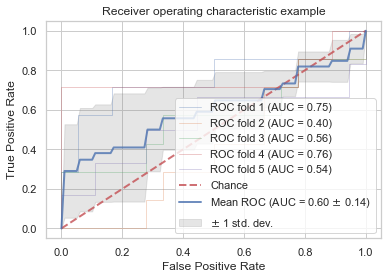

Mean of Each fold


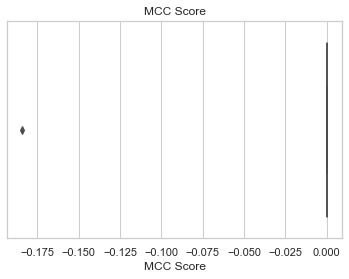

Matthews_corrcoef all:  [0.0, -0.18389242812245682, 0.0, 0.0, 0.0]
Matthews_corrcoef mean:  -0.03677848562449136


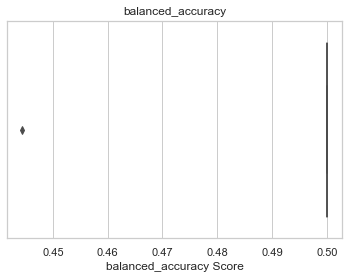

balanced_accuracy all:  [0.5, 0.4444444444444444, 0.5, 0.5, 0.5]
balanced_accuracy mean:  0.48888888888888893


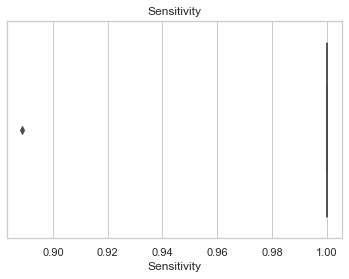

Sensitivity all:  [1.0, 0.8888888888888888, 1.0, 1.0, 1.0]
Sensitivity mean:  0.9777777777777779


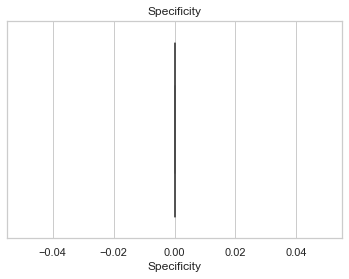

Specificity all:  [0.0, 0.0, 0.0, 0.0, 0.0]
Specificity mean:  0.0
One Combined Confusion Matrix
conf_matrix: 
  [[88  2]
 [34  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.98      0.83        90
         1.0       0.00      0.00      0.00        34

    accuracy                           0.71       124
   macro avg       0.36      0.49      0.42       124
weighted avg       0.52      0.71      0.60       124

matthews_corrcoef
-0.07869611378096039
balanced_accuracy_score
0.4888888888888889
Sensitivity
0.9777777777777777
Specificity
0.0
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6137254901960784


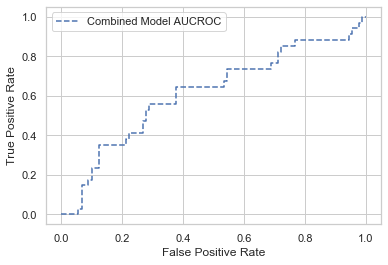

In [24]:
list_of_lists = []
    
for col in tox_list:
    
    method = "Morgan_2048"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    target=col
    
    
    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['MorganFingerprint'] =df_temp['smiles_r'].apply(MorganFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)

    X = np.array([x for x in df_temp['MorganFingerprint']])
    
    df_temp=df_temp.drop('MorganFingerprint', axis = 1)
    data=df_temp
    
    data=data.drop('smiles_r', axis = 1)
    y = data[target]

    y=y.to_numpy()
    
    print("Total Compounds in Assay: ", len(X))
       
    outercv = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
           
        param_grid = { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }
        
       # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs = 40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print("Tuned Mode: ", grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    print("Mean of Each fold")
       
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print("Matthews_corrcoef mean: ", np.mean(mat_cof))
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print("balanced_accuracy mean: ", np.mean(ba))
        
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print("Sensitivity mean: ", np.mean(sen))
        
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print("Specificity mean: ", np.mean(spe))
    

    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    mcc= matthews_corrcoef(combined_y_test, combined_y_pred)
    print(mcc)
    
    print('balanced_accuracy_score')
    ba= balanced_accuracy_score(combined_y_test, combined_y_pred)
    print(ba)
    
    print('Sensitivity')   
    sen=combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1])
    print(sen)
    
    print('Specificity')  
    spe=combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1])
    print(spe)
       
    print("AUC-ROC for the combined results: ")
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    print("Combined Model AUC ROC: ", roc_value_combined_model)
    
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    row=[col, method, sen, spe, ba, mcc, roc_value_combined_model]
    list_of_lists.append(row)

In [25]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "sen", "spe", "ba", "mcc", "auc_roc"])
df

,target,method,sen,spe,ba,mcc,auc_roc
0,BSK_hDFCGF_Proliferation_down,Morgan_2048,0.680000,0.696429,0.688214,0.376093,0.733929
1,APR_HepG2_CellLoss_72h_dn,Morgan_2048,0.813953,0.688889,0.751421,0.505990,0.829974
2,BSK_3C_Proliferation_down,Morgan_2048,0.673077,0.611111,0.642094,0.284594,0.696581
3,BSK_SAg_Proliferation_down,Morgan_2048,0.620690,0.541667,0.581178,0.162356,0.595905
4,BSK_3C_SRB_down,Morgan_2048,0.754098,0.222222,0.488160,-0.027570,0.533333
5,BSK_3C_Vis_down,Morgan_2048,0.815385,0.317073,0.566229,0.151955,0.625516
6,APR_HepG2_CellLoss_24h_dn,Morgan_2048,0.854545,0.303030,0.578788,0.189122,0.610468
7,BSK_LPS_SRB_down,Morgan_2048,0.865672,0.102564,0.484118,-0.046698,0.577880
8,BSK_CASM3C_Proliferation_down,Morgan_2048,0.814286,0.194444,0.504365,0.010567,0.536111
9,BSK_SAg_SRB_down,Morgan_2048,0.814286,0.222222,0.518254,0.043378,0.597024


In [26]:
file_name="Metrics_KFold_Aggregated"+method+".csv"
df.to_csv(file_name)